In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)

In [3]:
df_filtered = read.csv("../data/activity_inequality_and_steps_gender_gap_20170508.csv") 

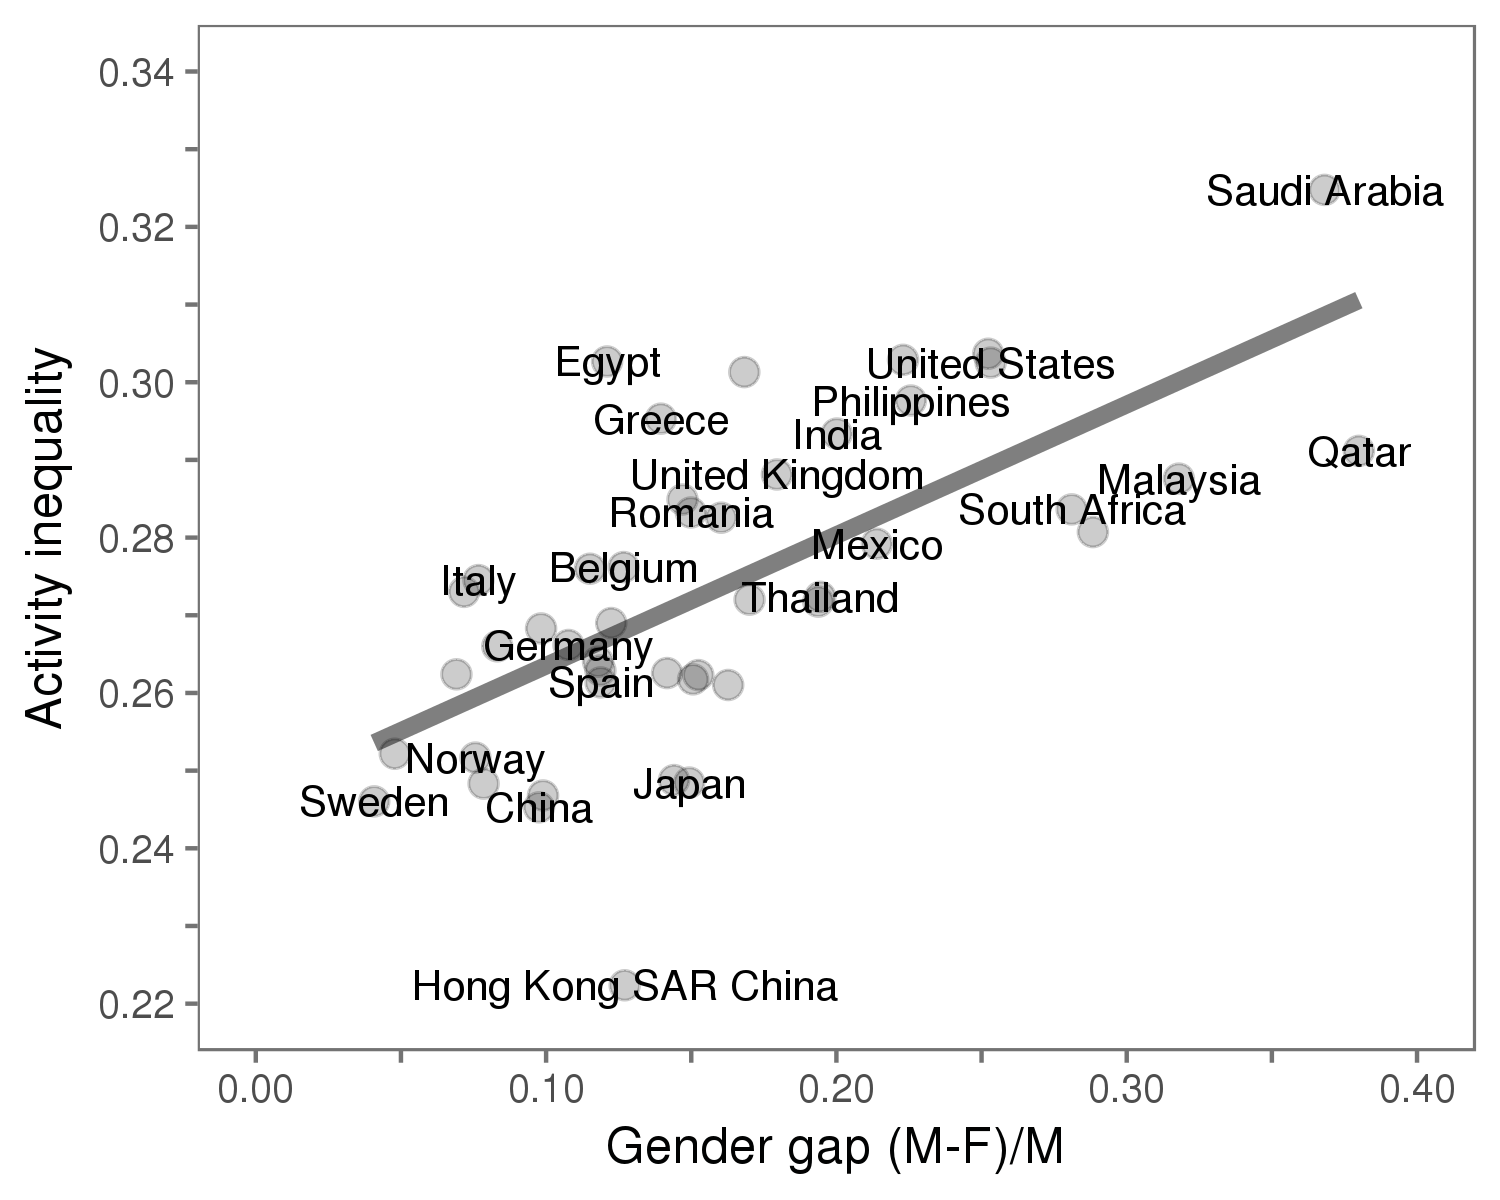

In [4]:
p <- ggplot(df_filtered, aes(steps_relative_gender_gap, steps_gini, 
                   label=country))
p <- p + geom_smooth(method="lm", color="gray50", alpha=1.0,  se = F, size=2.0) 
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + ylab("Activity inequality") + xlab("Gender gap (M-F)/M")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Set2")

# xticks
ticks = seq(.0,.40,by=0.05) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(.0, .4))
# yticks
ticks = seq(.20,.34,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.2f", ticks[seq(1, length(labels), 2)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels, limits=c(.22,.34))
p

ggsave(filename="../output/edfig7b.pdf", plot=p, width=5, height=3)

The gender gap explains 43% of the observed variance in activity inequality (linear fit: $R^2$ = 0.43).

In [5]:
summary(lm(steps_gini~steps_relative_gender_gap, data=df_filtered))


Call:
lm(formula = steps_gini ~ steps_relative_gender_gap, data = df_filtered)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045693 -0.010210 -0.002538  0.012596  0.035628 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               0.246702   0.005202  47.423  < 2e-16 ***
steps_relative_gender_gap 0.168086   0.029370   5.723  8.6e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01549 on 44 degrees of freedom
Multiple R-squared:  0.4267,	Adjusted R-squared:  0.4137 
F-statistic: 32.75 on 1 and 44 DF,  p-value: 8.601e-07
